In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:

import os
print(os.getcwd())


c:\Users\ASUS\OneDrive\Desktop\VIRAJ\INTERNSHIPS\cognifyz


In [3]:
df=pd.read_csv("Dataset .csv")

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df_cleaned = df.dropna(subset=['Cuisines'])

In [7]:
df_cleaned.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<h1><b>LEVEL 1</b></h1>
<h2>TASK 1</h2>

<h3><b>1: </b>Top Four most common cuisines</h3>

In [ ]:
from collections import Counter
cuisines_list=df['Cuisines'].str.split(', ').explode().dropna()
cuisines_count=Counter(cuisines_list)
top_cuisines=cuisines_count.most_common(3)
top_cuisines

[('North Indian', 3960), ('Chinese', 2735), ('Fast Food', 1986)]

<h3><b>2: </b> Restaurants that serve each of the top cuisines</h2>

In [9]:
total_restaurants = len(df)
percentage_top_cuisines = [(cuisine,(count / total_restaurants)*100) for cuisine, count in top_cuisines]
print(percentage_top_cuisines)

[('North Indian', 41.461627054758665), ('Chinese', 28.635744948172963), ('Fast Food', 20.793634174431997)]


<h2>TASK 2</h2>
<h3><b>1: </b>Identify the city with the highest number
of restaurants in the dataset</h3>

In [10]:
city_counts = df['City'].value_counts()
highest_city = city_counts.idxmax(), city_counts.max()
highest_city

('New Delhi', np.int64(5473))

<h3><b>2: </b>Calculate the average rating for restaurants in each city</h3>


In [11]:
average_rating_per_city = df.groupby('City')['Aggregate rating'].mean().reset_index()
average_rating_per_city.columns = ['City', 'Aggregate rating']
average_rating_per_city

,City,Aggregate rating
0,Abu Dhabi,4.300000
1,Agra,3.965000
2,Ahmedabad,4.161905
3,Albany,3.555000
4,Allahabad,3.395000
...,...,...
136,Weirton,3.900000
137,Wellington City,4.250000
138,Winchester Bay,3.200000
139,Yorkton,3.300000


<h3><b>3: </b>Determine the city with the highest
average rating</h3>

In [12]:
highest_average_rating_city = average_rating_per_city.loc[average_rating_per_city['Aggregate rating'].idxmax()]
highest_average_rating_city

City                Inner City
Aggregate rating           4.9
Name: 56, dtype: object

In [13]:
df_cleaned['Price range'].describe()

count    9542.000000
mean        1.804968
std         0.905563
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Price range, dtype: float64

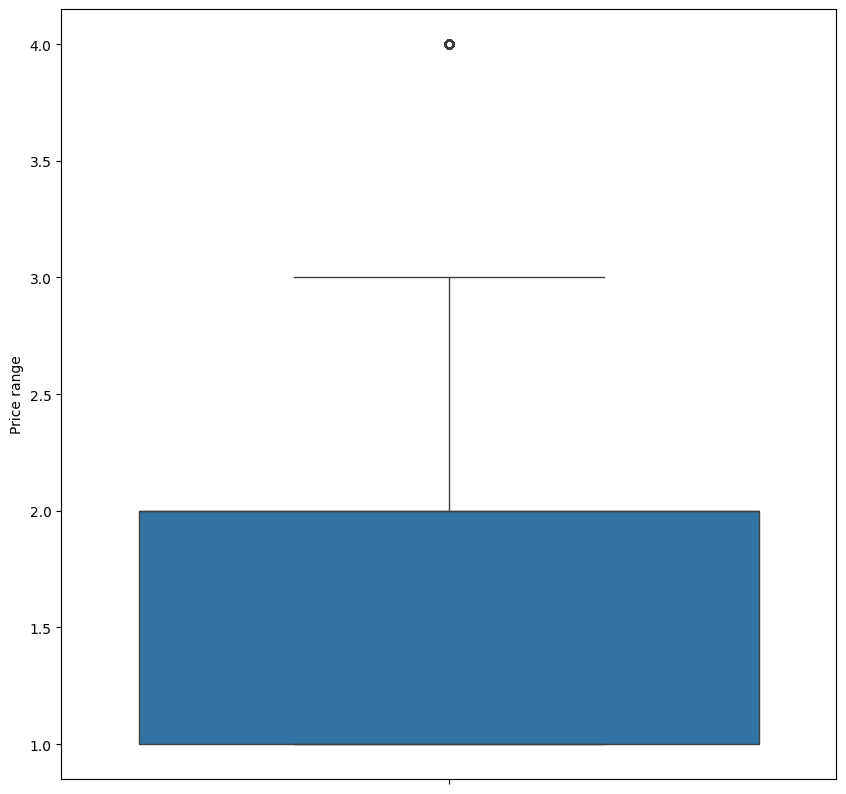

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(y='Price range',data=df_cleaned)
plt.show()

<h2>TASK 3</h2>
<h3><b>1: </b>Create a histogram or bar chart tovisualize the distribution of price ranges among the restaurants</h3>

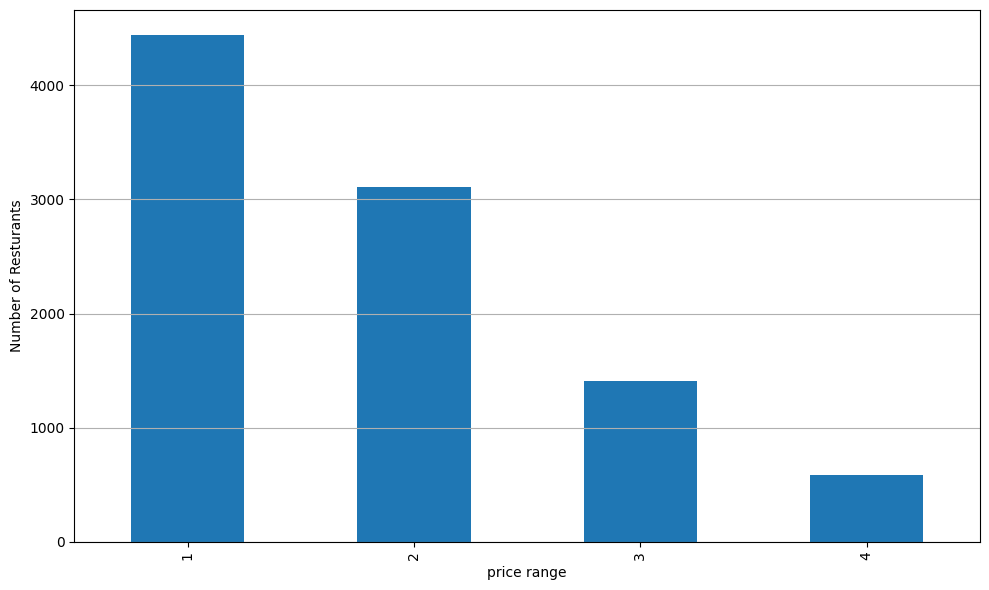

In [15]:
plt.figure(figsize=(10,6))
df_cleaned['Price range'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('price range')
plt.ylabel('Number of Resturants')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<h3><b>2: </b>Calculate the percentage of restaurants in each price range category</h3>


In [16]:
price_percentage=(df['Price range'].value_counts(normalize=True)*100).round(2)
price_percentage_df = price_percentage.reset_index()
price_percentage_df.columns = ['Price Range', 'Percentage']
print(price_percentage_df)


   Price Range  Percentage
0            1       46.53
1            2       32.59
2            3       14.74
3            4        6.14


<h2>TASK 4</h2>
<h3><b>1: </b>Determine the percentage of restaurants that offer online delivery</h3>

In [17]:

online_delivery_count = df['Has Online delivery'].value_counts(normalize=True) * 100
online_delivery_percentage = online_delivery_count.reset_index()
online_delivery_percentage.columns = ['Online Delivery', 'Percentage']
online_delivery_percentage

,Online Delivery,Percentage
0,No,74.337766
1,Yes,25.662234


<h3><b>2: </b>Compare the average ratings of restaurantswith and without online delivery</h3>

In [18]:
average_rating_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
average_rating_delivery.columns = ['Online Delivery', 'Average Rating']
average_rating_delivery

,Online Delivery,Average Rating
0,No,2.465296
1,Yes,3.248837


<h1><b>LEVEL 3</b></h1>
<h2>TASK 1</h2>

<h3><b>1: </b>Analyze the text reviews to identify the most
common positive and negative keywords</h3>

In [25]:
from collections import Counter
import string

all_reviews = " ".join(df['Rating text'].dropna().str.lower())

positive_words = {'excellent', 'amazing', 'good', 'great', 'fantastic', 'delicious', 'wonderful'}
negative_words = {'bad', 'poor', 'terrible', 'awful', 'worst', 'mediocre', 'disappointing'}

tokens = all_reviews.split()
cleaned_tokens = [word.strip(string.punctuation) for word in tokens if word.isalpha()]


word_counts = Counter(cleaned_tokens)


positive_counts = {word: count for word, count in word_counts.items() if word in positive_words}
negative_counts = {word: count for word, count in word_counts.items() if word in negative_words}

print("Most common positive keywords:", positive_counts)
print("Most common negative keywords:", negative_counts)

Most common positive keywords: {'excellent': 301, 'good': 3179}
Most common negative keywords: {'poor': 186}


<h3><b>2: </b>Calculate the average length of reviews and explore if there is a relationship between
review length and rating </h3>

In [26]:

df['Review Length'] = df['Rating text'].dropna().str.len()


average_review_length = df['Review Length'].mean()
print("Average Review Length:", average_review_length)

relationship = df.groupby('Aggregate rating')['Review Length'].mean()
print("Average Review Length by Rating:\n", relationship)

Average Review Length: 7.020730813527379
Average Review Length by Rating:
 Aggregate rating
0.0    9.0
1.8    4.0
1.9    4.0
2.0    4.0
2.1    4.0
2.2    4.0
2.3    4.0
2.4    4.0
2.5    7.0
2.6    7.0
2.7    7.0
2.8    7.0
2.9    7.0
3.0    7.0
3.1    7.0
3.2    7.0
3.3    7.0
3.4    7.0
3.5    4.0
3.6    4.0
3.7    4.0
3.8    4.0
3.9    4.0
4.0    9.0
4.1    9.0
4.2    9.0
4.3    9.0
4.4    9.0
4.5    9.0
4.6    9.0
4.7    9.0
4.8    9.0
4.9    9.0
Name: Review Length, dtype: float64



<h2>TASK 2</h2>
<h3><b>1: </b>Identify the restaurants with the highest and
lowest number of votes</h3>

In [27]:
highest_votes = df.loc[df['Votes'].idxmax(), ['Restaurant Name', 'Votes']]
print("Restaurant with the highest votes:", highest_votes)

lowest_votes = df.loc[df['Votes'].idxmin(), ['Restaurant Name', 'Votes']]
print("Restaurant with the lowest votes:", lowest_votes)


Restaurant with the highest votes: Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object
Restaurant with the lowest votes: Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object


<h3><b>2: </b>Analyze if there is a correlation between the number of votes and the rating of a
restaurant</h3>

In [28]:
correlation = df['Votes'].corr(df['Aggregate rating'])
print("Correlation between number of votes and rating:", correlation)

Correlation between number of votes and rating: 0.31369058419541146
